In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/FCN\ Project

/content/drive/MyDrive/FCN Project


In [49]:
df_mozilla = pd.read_csv('mozilla_pruned.csv')[:500]

In [50]:
df_mozilla

,Domain Name,Page Load Time,Request Response Time,Page Render Time,isHSTSEnabled,Category
0,aliexpress.com,4592,98,4585,1,Ecommerce
1,alibaba.com,3652,39,3570,1,Ecommerce
2,target.com,2802,63,2818,0,Ecommerce
3,lowes.com,2259,219,2234,1,Ecommerce
4,walmart.ca,2178,106,2183,0,Ecommerce
...,...,...,...,...,...,...
411,instagram.com,1266,572,1227,1,Social Media
412,facebook.com,946,140,883,1,Social Media
413,linkedin.com,487,138,485,0,Social Media
414,tumblr.com,924,22,921,1,Social Media


In [37]:
x = df_mozilla.isHSTSEnabled.value_counts().reset_index(name="Count")

In [38]:
x = x.rename(columns={'index':'isHSTSEnabled'})

In [39]:
for i in range(len(x)):
  if x.loc[i,"isHSTSEnabled"] == 0:
    x.loc[i,"isHSTSEnabled"] ="HSTS not Enabled"
  else:
    x.loc[i,"isHSTSEnabled"] ="HSTS Enabled"

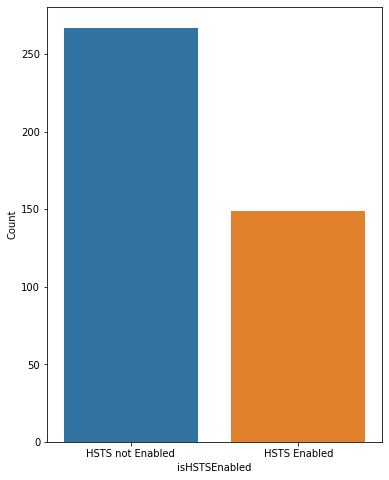

In [40]:
sns.barplot(x = 'isHSTSEnabled', y = 'Count' ,data=x)

In [41]:
colors = sns.color_palette('pastel')[0:2]

In [44]:

data = [267,129]
labels = ['HSTS not Enabled', 'HSTS Enabled']

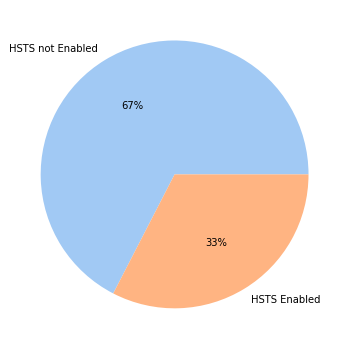

In [45]:

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [ ]:
df_chrome.groupby(['isHSTSEnabled']).mean().reset_index()

,isHSTSEnabled,Page Load Time,Request Response Time,Page Render Time
0,0,3344.289474,308.823308,3396.289474
1,1,2857.577181,245.825503,2892.147651


In [ ]:
df_mozilla_new.groupby(['isHSTSEnabled']).mean().reset_index()

,isHSTSEnabled,Page Load Time,Request Response Time,Page Render Time
0,0,1768.415730,227.801498,1781.074906
1,1,1579.932886,239.993289,1605.577181


In [ ]:
df_chrome_new.columns.to_list()

['Domain Name',
 'Page Load Time',
 'Request Response Time',
 'Page Render Time',
 'isHSTSEnabled']

In [ ]:
df_mozilla.groupby(['isHSTSEnabled']).median().reset_index()

,isHSTSEnabled,Page Load Time,Request Response Time,Page Render Time
0,0,1666,108,1669
1,1,1370,124,1403


In [11]:
plt.rcParams["figure.figsize"] = (6,8)

In [52]:
def generateboxplot_of_df(df,browser):
  df_long = pd.melt(df.loc[:, ~df.columns.isin(['Request Response Time', 'Domain Name','Category'])], "isHSTSEnabled", var_name="a", value_name="c")
  p = sns.boxplot(x="a", hue="isHSTSEnabled", y="c", data=df_long, showmeans=True)
  p.legend_.set_title(None)
  p.set_xlabel("Features", fontsize = 10)
  p.set_ylabel("Time (ms)", fontsize = 10)
  p.set_title("Box plot for features vs values for websites for {}".format(browser), fontsize = 10)
  plt.show()

In [63]:
for i in range(len(df_mozilla)):
  if df_mozilla.loc[i,"isHSTSEnabled"] == 0:
    df_mozilla.loc[i,"isHSTSEnabled"] = "HSTS not Enabled"
  else:
    df_mozilla.loc[i,"isHSTSEnabled"] = "HSTS Enabled"


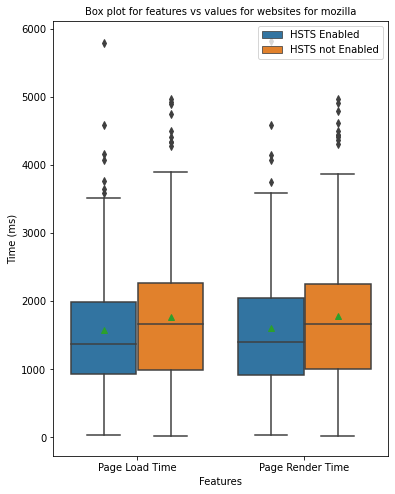

In [53]:
generateboxplot_of_df(df_mozilla,"mozilla")

In [54]:
def category_graph(df):
  dataframe = df.groupby(['Category','isHSTSEnabled']).median().reset_index()
  p = sns.barplot(x='Category',y='Page Load Time',hue='isHSTSEnabled',data=dataframe)
  p.legend_.set_title(None)
  p.set_ylabel("Median Page Load Times (ms)")
  p.set_xlabel("Category")
  p.set_title("Median Page Load times vs Category of websites")
  plt.xticks(rotation=90)
  

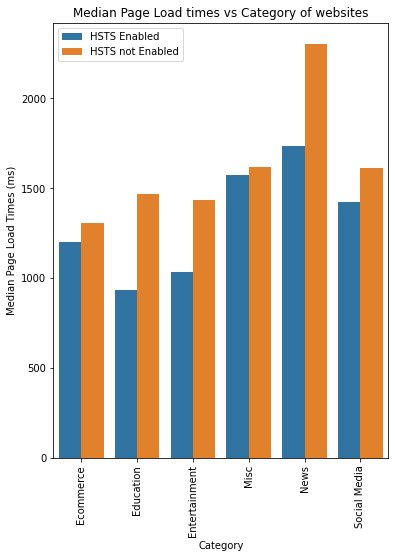

In [62]:
category_graph(df_mozilla)

In [57]:
grp = df_mozilla.groupby(['Category','isHSTSEnabled']).size().reset_index()

In [58]:
grp.rename(columns={0:'Count'}, inplace=True)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

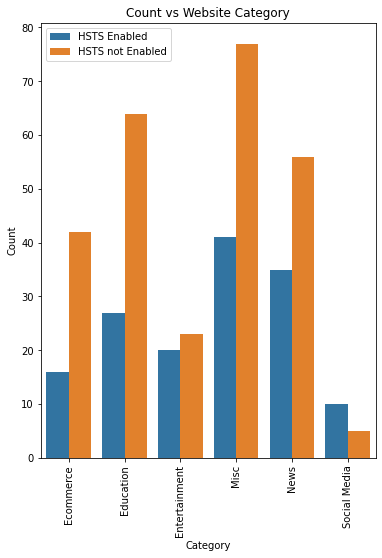

In [59]:
p = sns.barplot(x='Category',y='Count',hue='isHSTSEnabled', data=grp)
p.set_ylabel("Count")
p.set_xlabel("Category")
p.legend_.set_title(None)
p.set_title("Count vs Website Category")
plt.xticks(rotation=90)

In [60]:
def category_graph_page_render(df):
  dataframe = df.groupby(['Category','isHSTSEnabled']).median().reset_index()
  p = sns.barplot(x='Category',y='Page Render Time',hue='isHSTSEnabled',data=dataframe)
  p.set_ylabel("Median Page Render Times (ms)")
  p.set_xlabel("Category")
  p.legend_.set_title(None)
  p.set_title("Median Page Load times vs Category of websites")
  plt.xticks(rotation=90)

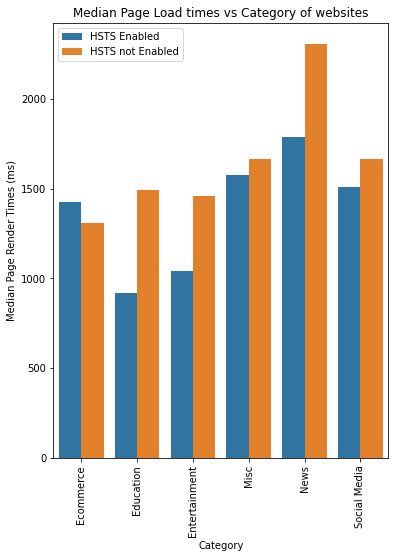

In [61]:
category_graph_page_render(df_mozilla)